<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# NLP Part 2: `CountVectorizer` and `TfidfVectorizer`



### Learning Objectives

- Extract features from unstructured text by fitting and transforming with `CountVectorizer` and `TfidfVectorizer`.
- Describe how CountVectorizers and TF-IDFVectorizers work.
- Understand `stop_words`, `max_features`, `min_df`, `max_df`, and `ngram_range`.


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Introduction to Text Feature Extraction

The models we've learned, like linear regression, logistic regression, and k-nearest neighbors, take in an `X` and a `y` variable.
- `X` is a matrix/dataframe of independent variables.
- `y` is a vector/series of representing the target variable.

Text data (also called natural language data) is not already organized as a matrix or vector of real numbers. We say that this data is **unstructured**.

> This lesson will focus on how to transform our unstructured text data into a numeric `X` matrix. This matrix is known as a term-document matrix, where each document is a row of the matrix and each column represents a frequency count of the occurence of the term in each document.  



## Basic terminology

---

- A collection of text is a **document**. 
    - You can think of a document as a row in your feature matrix.
- A collection of documents is a **corpus**. 
    - You can think of your full dataframe as the corpus.

# Count Vectorizer

In order to use unstructured data, first we have to put it in a structured format. 

Let's focus on the summary from the Top 250 TV shows that we obtained in the previous unit.


In [2]:
# First define the corpus of documents (body of documents)

shows_data = pd.read_csv('./data/Top_shows.csv')
shows_data.head()


,IMDB_id,Name,Summary,Rating,Genres,Network,Premier_Date,Status
0,tt0903747,Breaking Bad,<p><b>Breaking Bad</b> follows protagonist Wal...,9.3,"Drama,Crime,Thriller",AMC,2008-01-20,Ended
1,tt5491994,Planet Earth II,<p>David Attenborough presents a documentary s...,8.8,Nature,BBC One,2016-11-06,Ended
2,tt0795176,Planet Earth,<p>David Attenborough celebrates the amazing v...,8.9,Nature,BBC One,2006-03-05,Ended
3,tt0185906,Band of Brothers,<p>Drawn from interviews with survivors of Eas...,8.9,"Drama,Action,War",HBO,2001-09-09,Ended
4,tt7366338,Chernobyl,<p><b>Chernobyl</b> dramatizes the true story ...,8.9,"Drama,History",HBO,2019-05-06,Ended


Check our data that we read in:

In [3]:
shows_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IMDB_id       214 non-null    object 
 1   Name          214 non-null    object 
 2   Summary       212 non-null    object 
 3   Rating        198 non-null    float64
 4   Genres        211 non-null    object 
 5   Network       169 non-null    object 
 6   Premier_Date  214 non-null    object 
 7   Status        214 non-null    object 
dtypes: float64(1), object(7)
memory usage: 13.5+ KB


Since we want to analyse the Summary, we should drop the nulls.

In [4]:
shows_data.dropna(inplace=True)

In [5]:
# Have a look at the full summary for the first show
shows_data['Summary'][0]

"<p><b>Breaking Bad</b> follows protagonist Walter White, a chemistry teacher who lives in New Mexico with his wife and teenage son who has cerebral palsy. White is diagnosed with Stage III cancer and given a prognosis of two years left to live. With a new sense of fearlessness based on his medical prognosis, and a desire to secure his family's financial security, White chooses to enter a dangerous world of drugs and crime and ascends to power in this world. The series explores how a fatal diagnosis such as White's releases a typical man from the daily concerns and constraints of normal society and follows his transformation from mild family man to a kingpin of the drug trade.</p>"

In [6]:
# CountVectorizer requires a vector, so we need to get the series from the DataFrame. 
summary = shows_data['Summary']


In [7]:
summary

0      <p><b>Breaking Bad</b> follows protagonist Wal...
1      <p>David Attenborough presents a documentary s...
2      <p>David Attenborough celebrates the amazing v...
3      <p>Drawn from interviews with survivors of Eas...
4      <p><b>Chernobyl</b> dramatizes the true story ...
                             ...                        
209    <p>Post-WWII drama. Foyle, now working for Bri...
210    <p><b>The Night Of</b> is an eight-part limite...
211    <p>From Emmy Award winners John Wells, Ann Bid...
212    <p>New York City, 1900: The Knickerbocker Hosp...
213    <p>In the tranquil seaside town of Monterey, C...
Name: Summary, Length: 159, dtype: object

In [8]:
# instantiate the CountVectorizer
cvec = CountVectorizer(binary=True)


Some important default hyperparameters to consider first:
- `analyzer = 'word'` : the features to be identified are words
- `token_pattern = r'(?u)\b\w\w+\b'` : tokens consist of two or more alphanumeric characters
- `binary = False` : each occurence of the token is counted, if `True` then the matrix only records whether the token exists in the document.

Let's see the results when we fit the CountVectorizer to the `summary` corpus.

In [9]:
# Fit the count vectorizer to the corpus
cvec.fit(summary)

CountVectorizer(binary=True)

When we have unstructured text data, there is a lot of information in that text data.
- When we force unstructured text data to follow a "spreadsheet" or "dataframe" structure, we might lose some of that information.
- For example, CountVectorizer creates a vector (column) for each token and counts up the number of occurrences of each token in each document.

Our tokens are now stored as a **bag-of-words**. This is a simplified way of looking at and storing our data. 
- Bag-of-words representations discard grammar, order, and structure in the text but track occurrences.

<img src="images/countvectorizer.png" alt="drawing" width="750"/>

[Source](https://towardsdatascience.com/nlp-learning-series-part-2-conventional-methods-for-text-classification-40f2839dd061).


In [10]:
# The count vectorizer identifies each token as a feature. 
cvec.get_feature_names_out()

array(['000', '012', '10', ..., 'zealand', 'zero', 'über'], dtype=object)

In [11]:
# Transform into a term-document matrix
cv_matrix = cvec.transform(summary)
cv_matrix

<159x3526 sparse matrix of type '<class 'numpy.int64'>'
	with 8171 stored elements in Compressed Sparse Row format>

## Term-Document Matrix

As you can see, the matrix is in 'Compressed Sparse Row format', as there are many zeros. This is because many of the tokens appear only in one of the documents, but they are still assigned to one whole column of the matrix.

Let's print the matrix to see what it looks like.

In [12]:
print(cv_matrix)

  (0, 183)	1
  (0, 248)	1
  (0, 249)	1
  (0, 293)	1
  (0, 308)	1
  (0, 437)	1
  (0, 501)	1
  (0, 548)	1
  (0, 579)	1
  (0, 592)	1
  (0, 682)	1
  (0, 707)	1
  (0, 777)	1
  (0, 809)	1
  (0, 815)	1
  (0, 877)	1
  (0, 895)	1
  (0, 896)	1
  (0, 967)	1
  (0, 968)	1
  (0, 1071)	1
  (0, 1149)	1
  (0, 1172)	1
  (0, 1185)	1
  (0, 1194)	1
  :	:
  (158, 2280)	1
  (158, 2292)	1
  (158, 2325)	1
  (158, 2350)	1
  (158, 2499)	1
  (158, 2568)	1
  (158, 2689)	1
  (158, 2750)	1
  (158, 2758)	1
  (158, 2766)	1
  (158, 3031)	1
  (158, 3146)	1
  (158, 3147)	1
  (158, 3149)	1
  (158, 3176)	1
  (158, 3183)	1
  (158, 3198)	1
  (158, 3204)	1
  (158, 3225)	1
  (158, 3238)	1
  (158, 3325)	1
  (158, 3437)	1
  (158, 3458)	1
  (158, 3476)	1
  (158, 3491)	1


In [13]:
# converting to a dense matrix (show the whole matrix, including all the zeros)
cv_dense = cv_matrix.todense()
cv_dense

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
# Format as a dataframe to see the terms and documents
df = pd.DataFrame(data=cv_dense,columns = cvec.get_feature_names_out())
df

,000,012,10,100,12,13,13th,14,15,16,...,york,yorkshire,yoshihiro,you,young,younger,your,zealand,zero,über
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
157,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [15]:
df.sum()

000        1
012        1
10         3
100        1
12         4
          ..
younger    1
your       4
zealand    1
zero       1
über       1
Length: 3526, dtype: int64

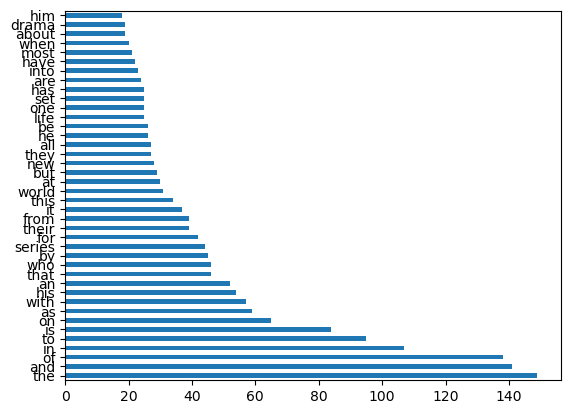

In [16]:

# plot top 10 occuring words
df.sum().sort_values(ascending=False).head(40).plot(kind='barh');

# Find the top 20 occurring instead. 

Creating a term-document matrix like this is also known as a bag-of-words approach.

<details><summary>What might be some of the advantages of using this bag-of-words approach when modeling?</summary>

- Efficient to store.
- Efficient to model.
- Keeps a decent amount of information.
</details>

<details><summary>What might be some of the disadvantages of using this bag-of-words approach when modeling?</summary>

- Since bag-of-words models discard grammar, order, structure, and context, we lose a decent amount of information.
- Phrases like "not bad" or "not good" won't be interpreted properly.
</details>

Let's see if we can process from the corpus so that it gives us more meaningful information.

We will consider some of the different hyperparameters of `CountVectorizer`:
- `stop_words`
- `max_features`, `max_df`, `min_df`
- `ngram_range`

 ## Stopwords
 
 Notice that there are many common words ('and','to', 'the') in the term-document matrix, which may not be very useful for analyzing common job requirements. 

`CountVectorizer` gives you the option to eliminate stopwords from your corpus when instantiating your vectorizer.

```python
cvec = CountVectorizer(stop_words='english')
```

You can optionally pass your own list of stopwords that you'd like to remove.
```python
cvec = CountVectorizer(stop_words=['list', 'of', 'words', 'to', 'stop'])
```
or to add more stopwords to the default set:

```python
from sklearn.feature_extraction import text

xtra_stop_words = text.ENGLISH_STOP_WORDS.union(['list', 'of', 'words', 'to', 'stop'])
cvec = CountVectorizer(stop_words=xtra_stop_words)
```


In [17]:
from sklearn.feature_extraction import text

# let's remove the main common words
xtra_stop_words = text.ENGLISH_STOP_WORDS.union(['series','set'])

# instantiate the CountVectorizer with default english stopwords
cvec_stopwords = CountVectorizer(stop_words=list(xtra_stop_words))

# fit_transform is a more efficient way of performing both the fit and transform in one step
cvec_stopwords.fit_transform(summary)

# how many features are identified?

<159x3307 sparse matrix of type '<class 'numpy.int64'>'
	with 5386 stored elements in Compressed Sparse Row format>

In [18]:
xtra_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [19]:
cvec_stopwords.get_feature_names_out()

array(['000', '012', '10', ..., 'zealand', 'zero', 'über'], dtype=object)

In [20]:
cv_matrix = cvec_stopwords.transform(summary)

In [21]:
cv_matrix

<159x3307 sparse matrix of type '<class 'numpy.int64'>'
	with 5386 stored elements in Compressed Sparse Row format>

In [22]:
# Format as a dataframe to see the terms and documents
df = pd.DataFrame(data=cv_matrix.todense(),columns = cvec_stopwords.get_feature_names_out())
df

,000,012,10,100,12,13,13th,14,15,16,...,yes,yogurt,york,yorkshire,yoshihiro,young,younger,zealand,zero,über
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
157,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


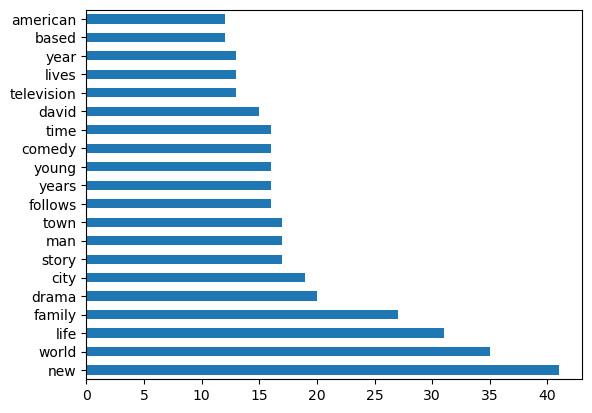

In [23]:

# plot top occuring words
df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

# Find the top 20 occurring instead. 

### Vocabulary size

---
One downside to `CountVectorizer` is the size of its vocabulary (`cvec.get_feature_names_out()`) can get really large. We're creating one column for every unique token in your corpus of data!

There are three hyperparameters to help you control this.

1. You can set `max_features` to only include the $N$ most popular vocabulary words in the corpus.

```python
cvec = CountVectorizer(max_features=1_000) # Only the top 1,000 words from the entire corpus will be saved
```

2. You can tell `CountVectorizer` to only consider words that occur in **at least** some number of documents (df = document frequency)

```python
cvec = CountVectorizer(min_df=2) # A word must occur in at least two documents from the corpus
```

3. Conversely, you can tell `CountVectorizer` to only consider words that occur in **at most** some percentage of documents.

```python
cvec = CountVectorizer(max_df=.98) # Ignore words that occur in > 98% of the documents from the corpus
```

Both `max_df` and `min_df` can accept either an integer or a float.
- An integer tells us the number of documents.
- A float tells us the percentage of documents.

<details><summary>Why might we want to control these vocabulary size hyperparameters?</summary>
    
- If we have too many features, our models may take a **very** long time to fit.
- Control for overfitting/underfitting.
- Words in 99% of documents or words occuring in only one document might not be very informative.
</details>

### N-Gram Range
---

`CountVectorizer` has the ability to capture $n$-word phrases, also called $n$-grams. 

The `ngram_range` determines what $n$-grams should be considered as features.

```python
cvec = CountVectorizer(ngram_range=(2,2)) # Captures only 2-grams
```

```python
cvec = CountVectorizer(ngram_range=(1,2)) # Captures every 1-gram and every 2-gram
```
Let's see the difference with our `summary` documents.

In [24]:
# Try with different ngram_ranges and add to the list of stop words 
cvec = CountVectorizer(ngram_range=(2,2), stop_words='english', max_df=3, binary=True)

cvec.fit(summary)
cv_matrix = cvec.transform(summary)

In [25]:
# What are the feature names now?
cvec.get_feature_names_out()

array(['000 desperate', '012 men', '10 episode', ..., 'zealand try',
       'zero antibiotics', 'über hipster'], dtype=object)

In [26]:
# Store as a data frame
df = pd.DataFrame(data=cv_matrix.todense(),columns = cvec.get_feature_names_out())
df

,000 desperate,012 men,10 episode,10 million,100 witnesses,12 controversial,12 gon,12 meets,13 terrestrial,13 year,...,young orphaned,young programmer,young rookie,young tanjiro,young waterbender,younger brother,zealand consulate,zealand try,zero antibiotics,über hipster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


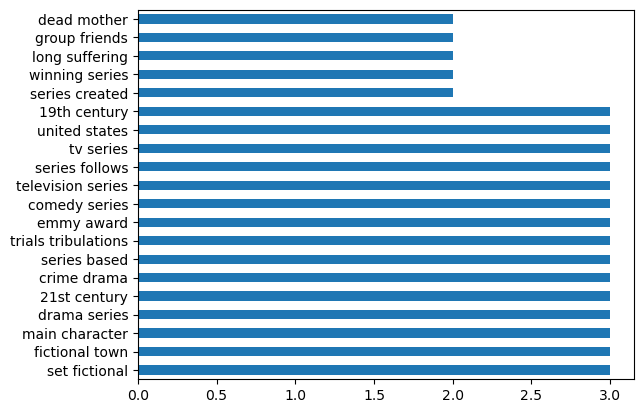

In [27]:
# Plot the top 20 occurring features
# plot top occuring words
df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

Congratulations! We've used `CountVectorizer` to transform our text data into something we can pass into a model.

But what if we want to do something more than just count up the occurrence of each token?

## Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer

---

When modeling, which word do you think tends to be the most helpful?
- Words that are common across all documents.
- Words that are rare across all documents.
- Words that are rare across some documents, and common across some documents.

<details><summary>Answer:</summary>

- Words that are common in certain documents but rare in other documents tend to be more informative than words that are common in all documents or rare in all documents.
- Example: If we were examining poetry over time, the word "thine" might be common in some documents but rare in most documents. The word "thine" is probably pretty informative in this case.
</details>

TF-IDF is a score that tells us which words are important to one document, relative to all other documents. Words that occur often in one document but don't occur in many documents contain more predictive power.

Variations of the TF-IDF score are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.
- If you want to see how it can be calculated, check out [the Wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) and [`sklearn`](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting) page.


[Source](https://towardsdatascience.com/nlp-learning-series-part-2-conventional-methods-for-text-classification-40f2839dd061).

### Practice Using the `TfidfVectorizer`

---

`sklearn` provides a TF-IDF vectorizer that works similarly to the CountVectorizer.
- The arguments `stop_words`, `max_features`, `min_df`, `max_df`, and `ngram_range` also work here.



In [28]:
# Instantiate the transformer.
tvec = TfidfVectorizer(ngram_range=(2,2), stop_words='english')

In [29]:
# fit and transform the job descriptions
tv_matrix = tvec.fit_transform(summary)

In [30]:
# how many features are there? 

# is it the same as the count vectorizer with the same hyperparameter values?
tvec.get_feature_names_out()

array(['000 desperate', '012 men', '10 episode', ..., 'zealand try',
       'zero antibiotics', 'über hipster'], dtype=object)

In [31]:
# Put in a dataframe and view it
tv_matrix.todense()

df = pd.DataFrame(data = tv_matrix.todense(), columns = tvec.get_feature_names_out())
# What kind of values are stored now?


In [32]:
df

,000 desperate,012 men,10 episode,10 million,100 witnesses,12 controversial,12 gon,12 meets,13 terrestrial,13 year,...,young orphaned,young programmer,young rookie,young tanjiro,young waterbender,younger brother,zealand consulate,zealand try,zero antibiotics,über hipster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.130456,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.116328,0.0


<AxesSubplot:>

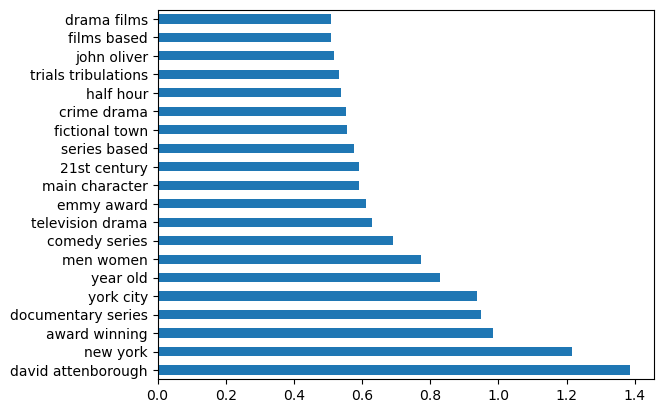

In [33]:
# Plot the top occurring features. Are they the same as before?
df.sum().sort_values(ascending=False).head(20).plot(kind='barh')

Are the results different? Try with different hyperparameter values. 

## Topic Modelling

One application of using the Term-Document-Matrix might be to perform topic modelling, which is to 'discover' the topics that are occurring a corpus of documents. 

Let's try it with the bag of words that we have obtained with the TfidfVectorizer.

One algorithm for Topic Modelling is **LatentDirichletAllocation**. Let's try it out to identify some topics from our job descriptions.


In [34]:
from sklearn.decomposition import LatentDirichletAllocation

# Let's say we want to identify 5 topics

num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(df)

# Get the top 10 keywords for each topic
num_keywords = 10
feature_names = tvec.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    print(", ".join([feature_names[i] for i in topic.argsort()[:-num_keywords - 1:-1]]))
    print("\n")

Topic 0:
music scene, lives lives, scene order, cousins work, order better, lives families, atlanta music, better lives, work atlanta, london thrilling


Topic 1:
space time, adventures time, alien companions, time travelling, travelling alien, 1920s birmingham, lawless streets, streets 1920s, set lawless, epic gangster


Topic 2:
drama films, based commandments, films based, television drama, alfred hitchcock, friends search, search hearts, desire couple, couple metal, hearts desire


Topic 3:
david attenborough, saul goodman, true detective, follows vampires, vampires roommates, shadows follows, roommates hundreds, hundreds hundreds, hundreds years, city shadows


Topic 4:
winning sitcom, rowan atkinson, middle school, award winning, power geass, mr bean, challenges surviving, meet challenges, surviving iconic, attenborough presents


Topic 5:
south park, series follows, criminal justice, new york, consistently awful, ireland priests, weather planet, island west, bunch nuns, small is